# Cross Species

In [1]:
import cpa
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import os
import pandas as pd
import scanpy as sc
import seaborn as sns
import torch

sc.set_figure_params(dpi=100, frameon=False)
sc.logging.print_header()

%load_ext autoreload
%autoreload 2

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.6


In [2]:
adata = sc.read('../datasets/cross_species_new.h5ad')

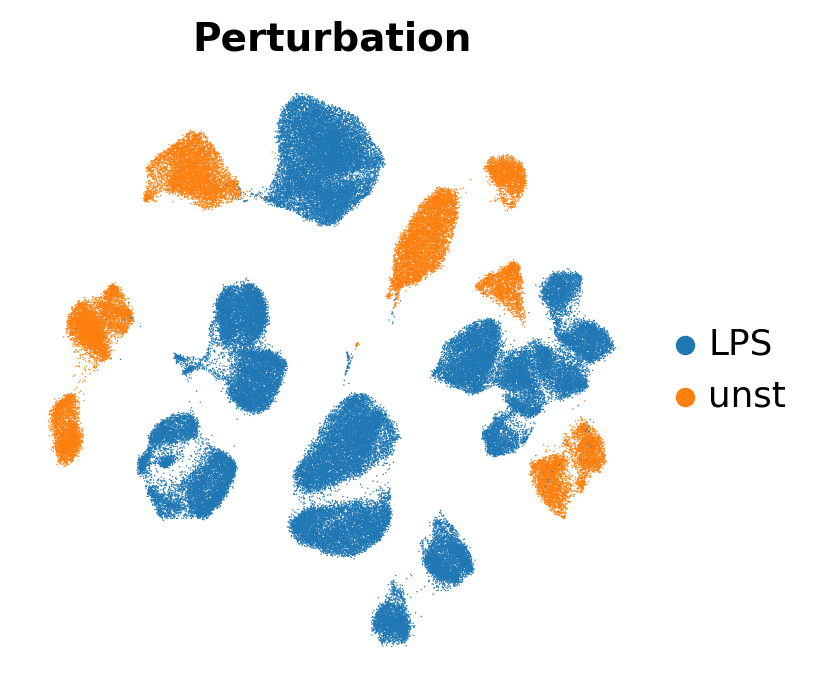

In [3]:
fig, ax = plt.subplots(1, 1)
sc.pl.umap(adata, color='condition', show=False, ax=ax)
ax.set_title('Perturbation', fontweight='bold')
fig.savefig('figures/suppfig_cs/umap.png', dpi=600, bbox_inches='tight')

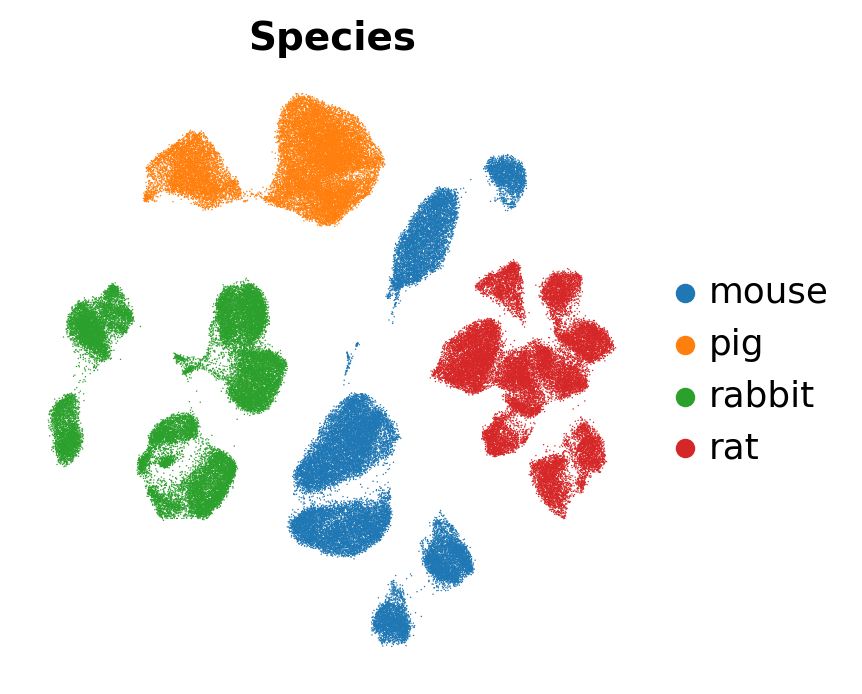

In [4]:
fig, ax = plt.subplots(1, 1)
sc.pl.umap(adata, color='species', show=False, ax=ax)
ax.set_title('Species', fontweight='bold')
fig.savefig('figures/suppfig_cs/umap_species.png', dpi=600, bbox_inches='tight')

In [5]:
cpa_api = cpa.api.API(
    adata, 
    device='cuda', 
    perturbation_key='condition',
    covariate_keys=['species'],
    dose_key='dose_val',
    split_key='split',
    doser_type='logsigm',
    save_dir=os.getcwd(),
    #hparams={
    # 'adversary_depth': 4,
    # 'adversary_lr': 0.00011449841102360934,
    # 'adversary_steps': 5,
    # 'adversary_wd': 2.566646412047788e-05,
    # 'adversary_width': 128,
    # 'autoencoder_depth': 3,
    # 'autoencoder_lr': 0.0072012676544915485,
    # 'autoencoder_wd': 8.568813528193707e-08,
    # 'autoencoder_width': 256,
    # 'batch_size': 512,
    # 'dim': 62,
    # 'dosers_depth': 2,
    # 'dosers_lr': 0.0041682125770167115,
    # 'dosers_wd': 1.2608657140681292e-07,
    # 'dosers_width': 64,
    # 'penalty_adversary': 0.055239439550118896,
    # 'reg_adversary': 5.857451989990193,
    # 'step_size_lr': 25
    #}
)

In [6]:
cpa_api.train(
    max_epochs=500, 
    checkpoint_freq=200,
    run_eval=True,
    filename='/CS_logsigm.pt', 
    max_minutes=60
)

Results will be saved to the folder: /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/notebooks


Rec: -1.4687, AdvPert: 0.59, AdvCov: 1.36: 100%|▉| 499/500 [32:42<00:03,  3.93s/

Model saved to: /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/notebooks/CS_logsigm.pt
{'ellapsed_minutes': 31.59794464906057,
 'epoch': 499,
 'evaluation_stats': {'ood': [0.9480907829738681,
                              0.8657849246574008,
                              0.6034503004805367,
                              0.23315599030791478],
                      'optimal for perturbations': 0.5,
                      'optimal for species': 0.25,
                      'perturbation disentanglement': 0.5741980075836182,
                      'species disentanglement': 0.27686914801597595,
                      'test': [0.9915829067620758,
                               0.9713995090171301,
                               0.9539215472797532,
                               0.8400911319787359],
                      'training': [0.9920437586938106,
                                   0.9718681244362564,
                                   0.9555840084485294,
                 

Model saved to: /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/notebooks/CS_logsigm.pt


In [5]:
cpa_api = cpa.api.API(
    adata, 
    covariate_keys=['species'],
    pretrained='CS_default.pt',
)

Loaded pretrained model from:	CS_default.pt


In [36]:
cpa_api.train(
    max_epochs=500, 
    checkpoint_freq=200,
    run_eval=True,
    filename='/CS_default.pt', 
    max_minutes=60
)

Results will be saved to the folder: /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/notebooks


Rec: -1.4693, AdvPert: 0.59, AdvCov: 1.36: 100%|▉| 499/500 [48:12<00:05,  5.80s/

Model saved to: /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/notebooks/CS_default.pt
{'ellapsed_minutes': 46.882342127958935,
 'epoch': 499,
 'evaluation_stats': {'ood': [0.9619475158909888,
                              0.8929267467658725,
                              0.7972015829883611,
                              0.5129087582094654],
                      'optimal for perturbations': 0.5,
                      'optimal for species': 0.25,
                      'perturbation disentanglement': 0.6208006739616394,
                      'species disentanglement': 0.21710027754306793,
                      'test': [0.9925443045638566,
                               0.9758826456910895,
                               0.9520463093991478,
                               0.8621675936320794],
                      'training': [0.9929384519808727,
                                   0.9761033074217494,
                                   0.9539070437354222,
                 

Model saved to: /storage/groups/ml01/workspace/carlo.dedonno/cpa-reproducibility/notebooks/CS_default.pt


Computation time: 47 min


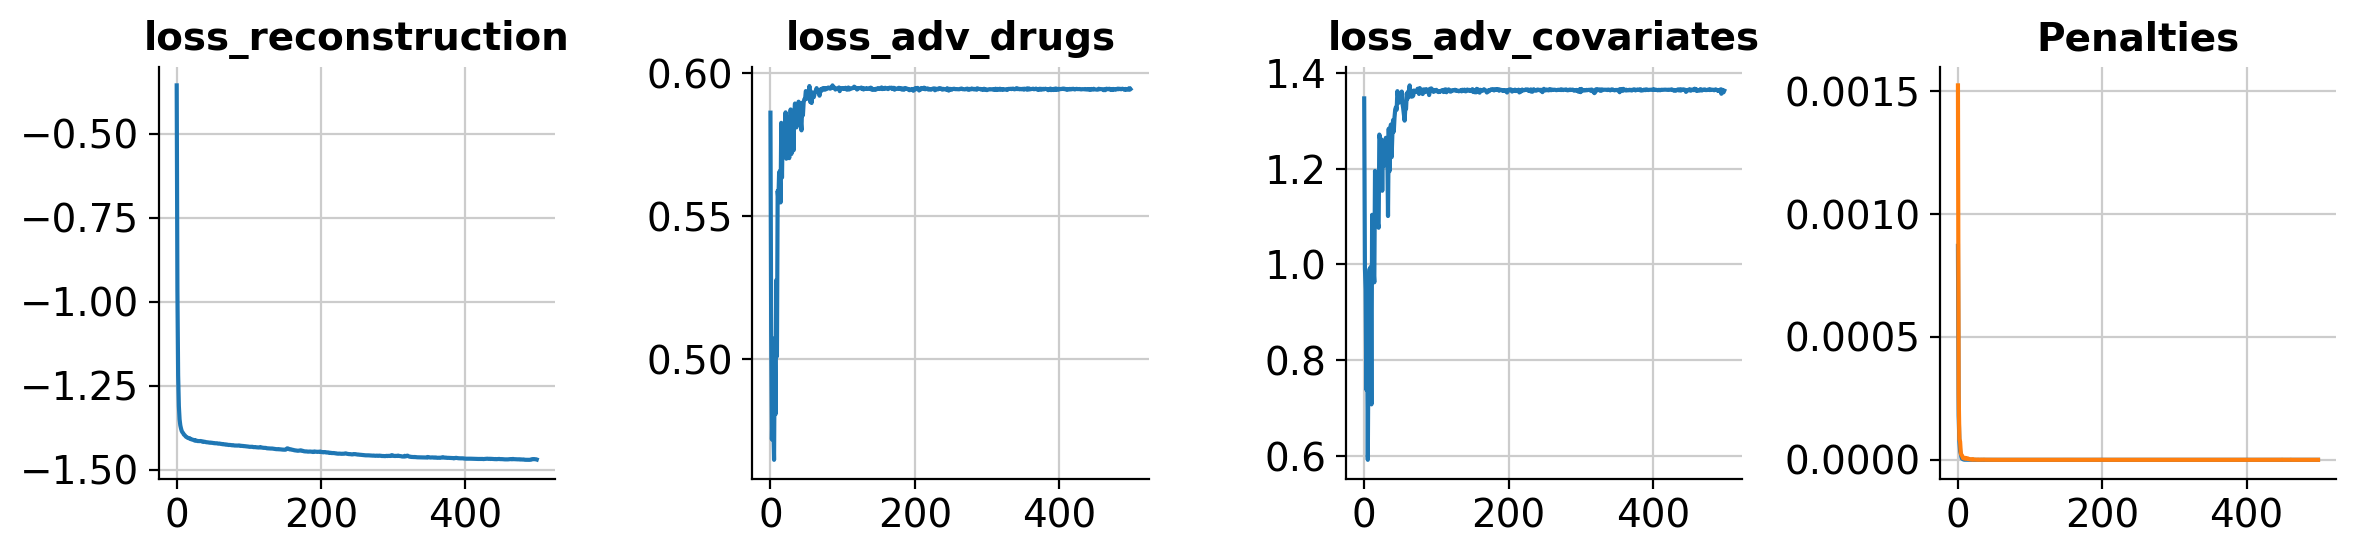

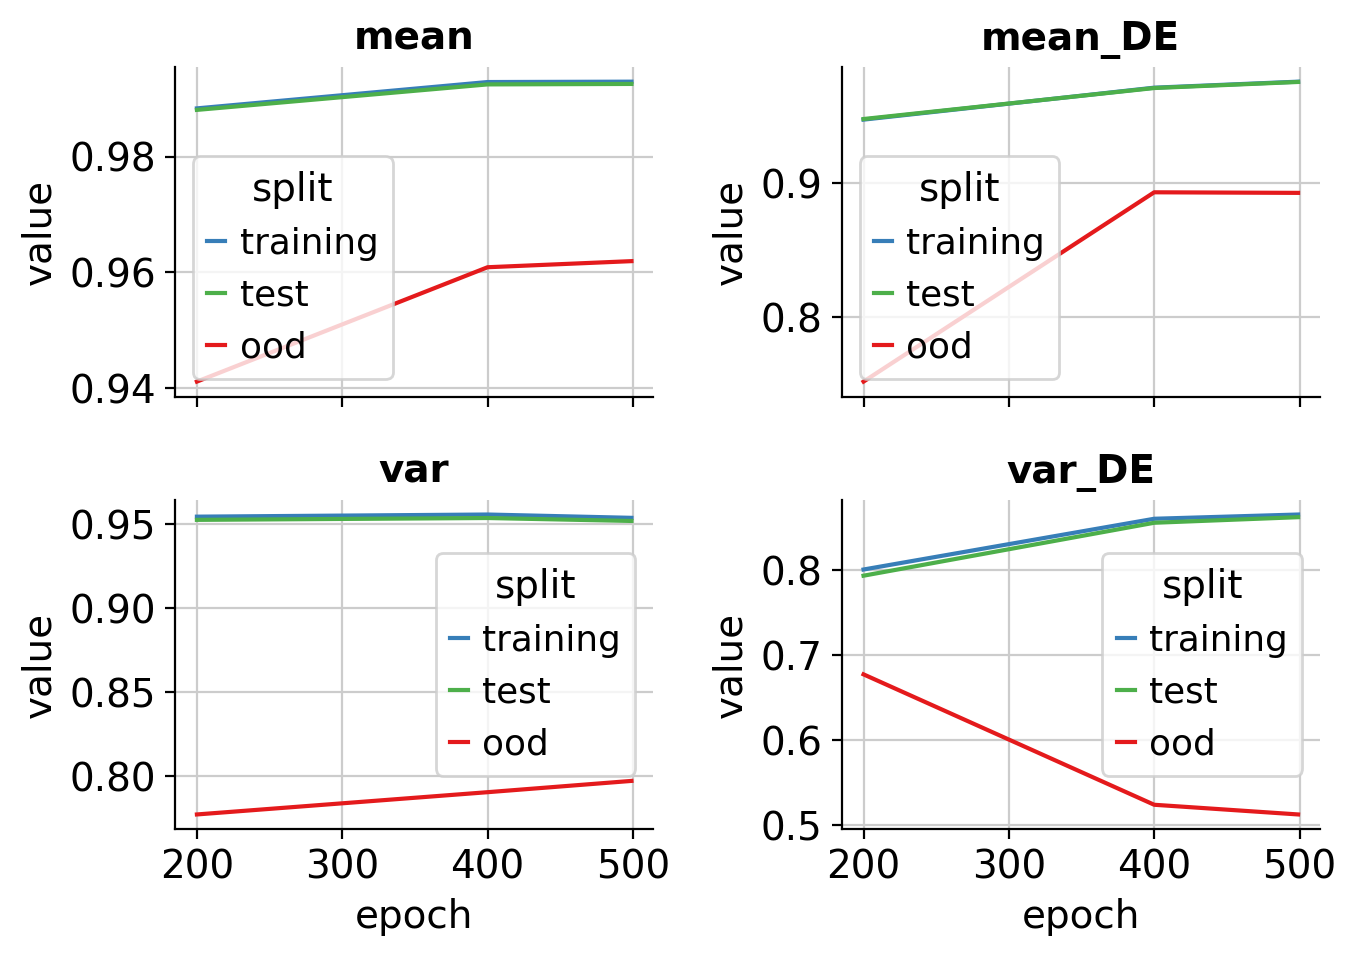

In [6]:
from cpa.plotting import CPAHistory
history = CPAHistory(cpa_api)
history.print_time()
history.plot_losses()
history.plot_r2_metrics(epoch_min=0)

In [7]:
cpa_api.num_measured_points['training']

{'mouse_LPS_0.3333333333333333': 7114,
 'mouse_LPS_0.6666666666666666': 6398,
 'mouse_LPS_1.0': 3746,
 'mouse_unst_1.0': 5952,
 'pig_LPS_0.3333333333333333': 3797,
 'pig_LPS_0.6666666666666666': 4573,
 'pig_LPS_1.0': 3568,
 'pig_unst_1.0': 4166,
 'rabbit_LPS_0.3333333333333333': 6131,
 'rabbit_LPS_0.6666666666666666': 4118,
 'rabbit_LPS_1.0': 4727,
 'rabbit_unst_1.0': 6050,
 'rat_LPS_0.3333333333333333': 4887,
 'rat_LPS_0.6666666666666666': 4040,
 'rat_unst_1.0': 4634}

In [8]:
perts_anndata = cpa_api.get_drug_embeddings()
covars_anndata = cpa_api.get_covars_embeddings(covars_tgt='species')

In [9]:
latent = cpa_api.model.encoder(
    torch.tensor(adata.X.A, device='cuda')
).detach().cpu().numpy()

In [10]:
adata_latent = sc.AnnData(
    X=latent,
    obs=adata.obs
)

In [11]:
sc.pp.pca(adata_latent)
sc.pp.neighbors(adata_latent)
sc.tl.umap(adata_latent)

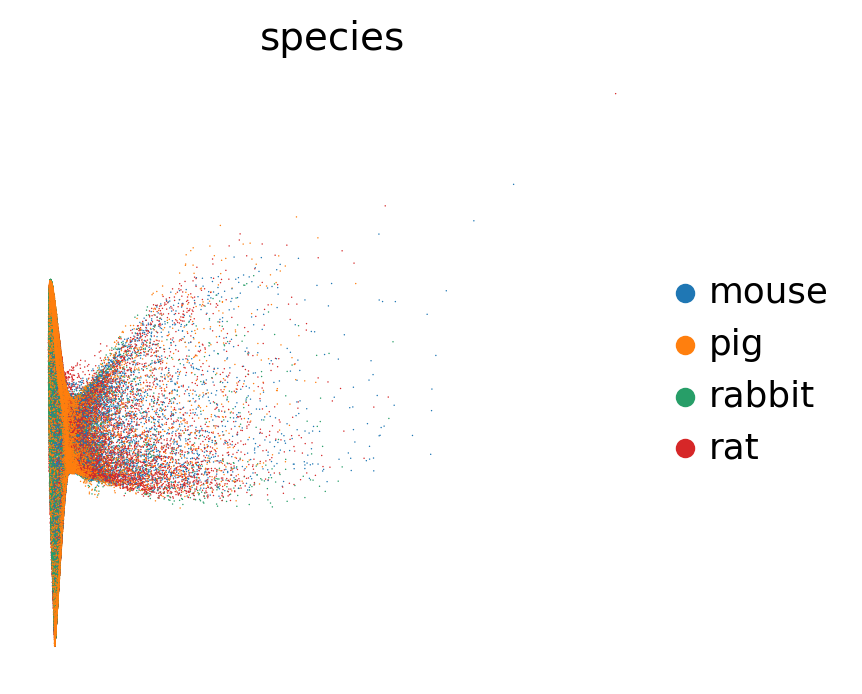

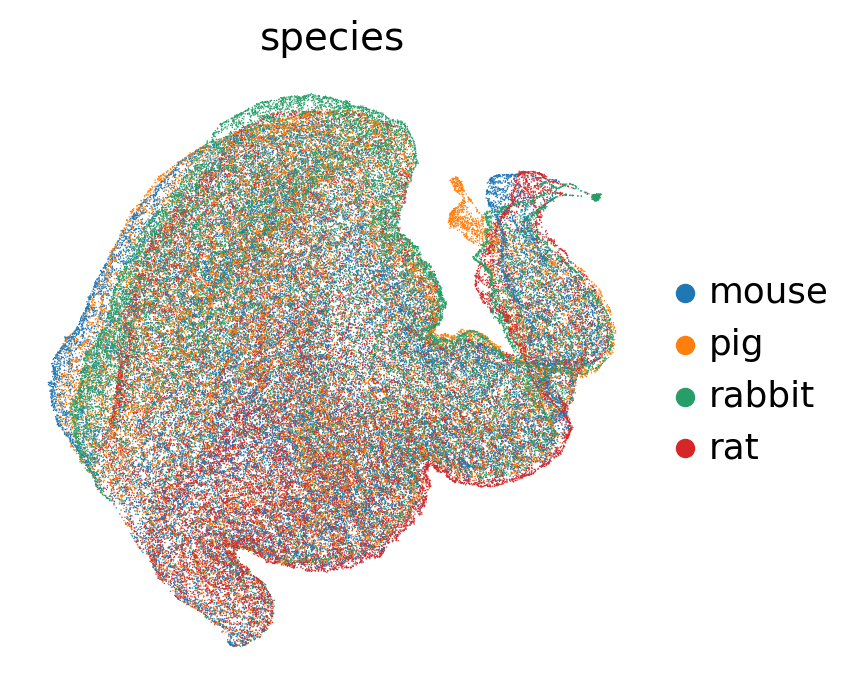

In [12]:
sc.pl.pca(adata_latent, color='species')
sc.pl.umap(adata_latent, color='species')

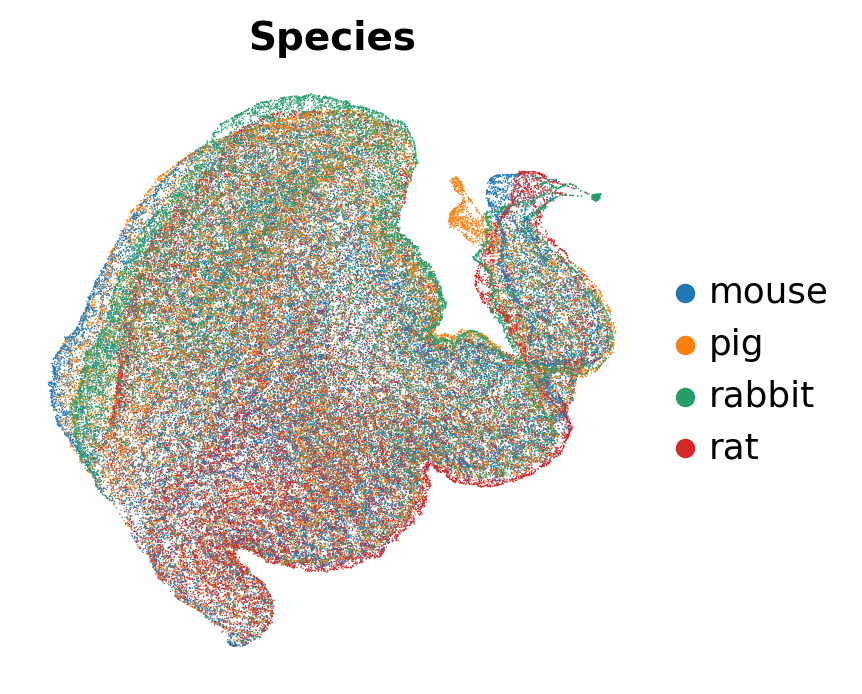

In [13]:
fig, ax = plt.subplots(1, 1)
sc.pl.umap(adata_latent, color='species', show=False, ax=ax)
ax.set_title('Species', fontweight='bold')
fig.savefig('figures/suppfig_cs/umap_species_basal.png', dpi=600, bbox_inches='tight')

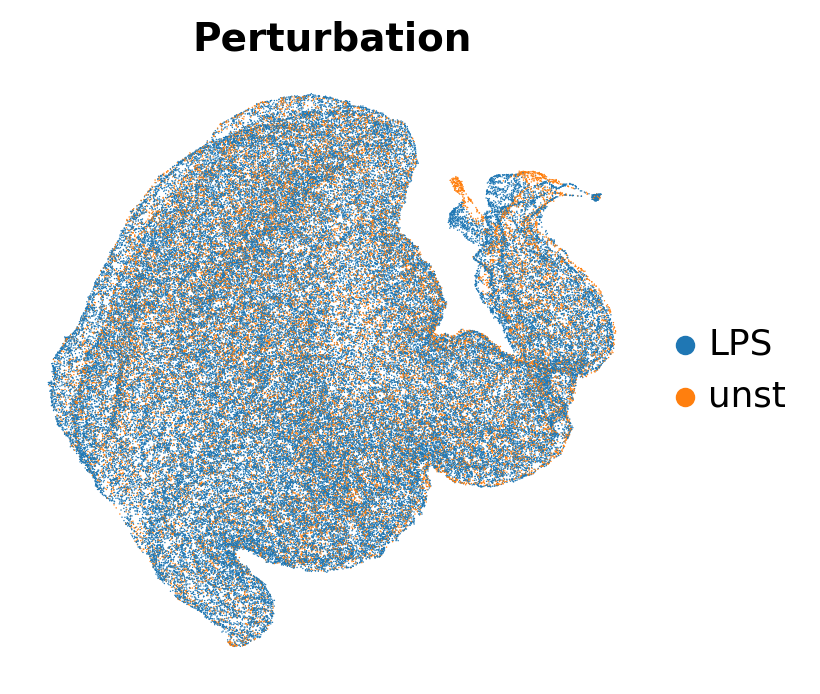

In [14]:
fig, ax = plt.subplots(1, 1)
sc.pl.umap(adata_latent, color='condition', show=False, ax=ax)
ax.set_title('Perturbation', fontweight='bold')
fig.savefig('figures/suppfig_cs/umap_basal.png', dpi=600, bbox_inches='tight')

In [15]:
from cpa.plotting import CPAVisuals
cpa_plots = CPAVisuals(cpa_api)

Saved file to: figures/suppfig_cs/embeddings.png
Saved file to: figures/suppfig_cs/embeddings_similarity.png


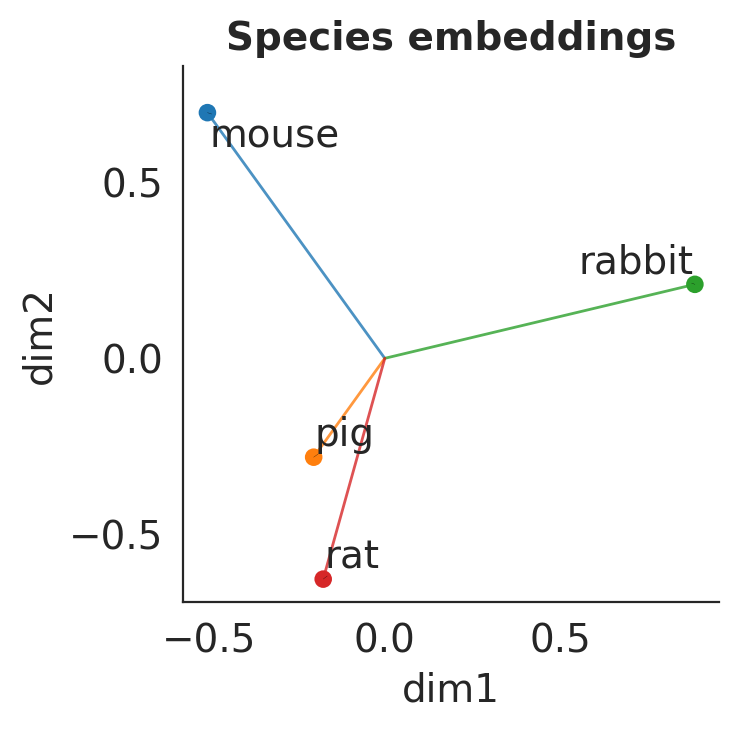

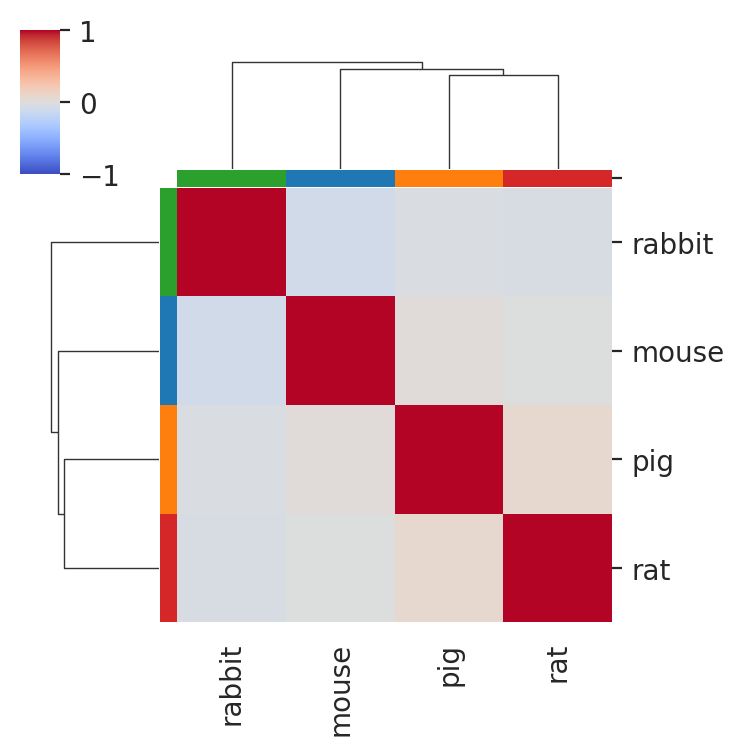

In [16]:
cpa_plots.plot_latent_embeddings(
    list(cpa_api.emb_covars['species'].values()), 
    kind='species', 
    show_text=True, 
    titlename='Species embeddings',
    filename='figures/suppfig_cs/embeddings.png'
)

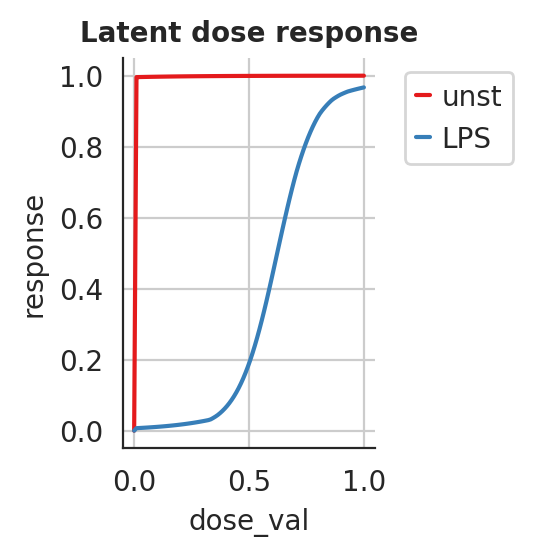

In [17]:
latent_response = cpa_api.latent_dose_response()
cpa_plots.plot_contvar_response(
    latent_response, 
    postfix='latent',
    var_name=cpa_api.perturbation_key,
    figsize=(4, 3),
    bbox=(1.6, 1.),
    title_name='Latent dose response')

In [18]:
reconstructed_response = cpa_api.get_response()

{'species': ['mouse']}
{'species': ['pig']}
{'species': ['rabbit']}
{'species': ['rat']}


In [19]:
df_reference = cpa_api.get_response_reference()

In [20]:
reconstructed_response['dose_val'] *= 6

In [21]:
reconstructed_response = reconstructed_response[reconstructed_response['condition'] == 'LPS']
reconstructed_response = reconstructed_response[reconstructed_response['dose_val'] >= 2]

In [22]:
df_reference['dose_val'] *= 6

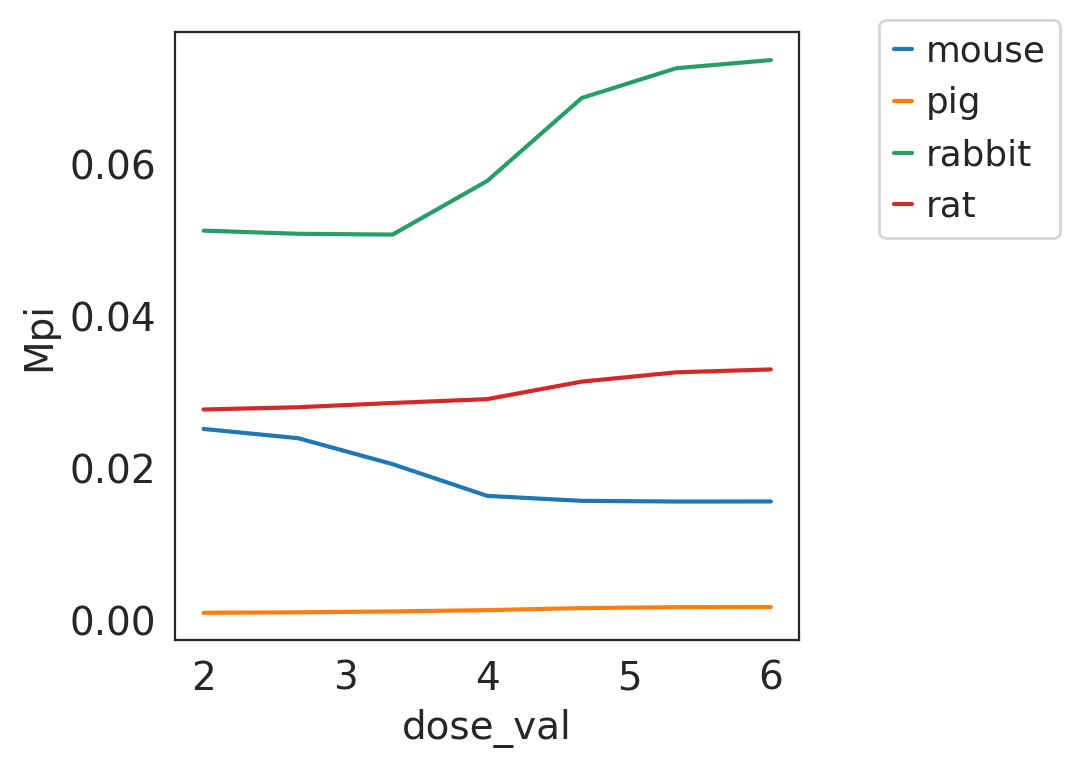

In [23]:
fig, ax = plt.subplots(1, 1)
sns.lineplot(x=reconstructed_response['dose_val'], y=reconstructed_response['Mpi'], hue=reconstructed_response['species'], ax=ax)
ax.legend(bbox_to_anchor=(1.1, 1.05))

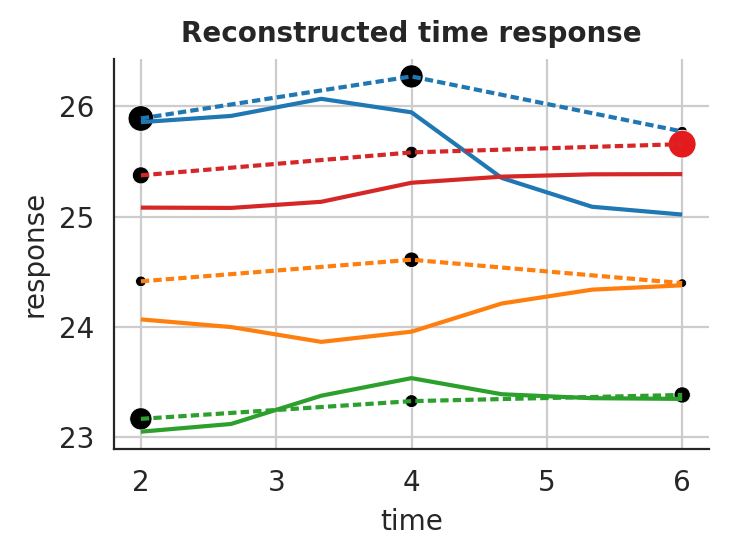

In [24]:
cpa_plots.plot_contvar_response(
    reconstructed_response, 
    df_ref=df_reference, 
    var_name='species',
    postfix='reconstructed',
    title_name='Reconstructed time response', 
    figsize=(4, 3),
    bbox=(1.6, 1.),
    xlabelname='time',
    logdose=False
)

In [25]:
df_reference

species condition  dose_val     split num_cells   response       Mpi  \
0    mouse       LPS       2.0  training      7114  25.890383  0.022212   
1    mouse       LPS       4.0  training      6398  26.272175  0.017368   
2    mouse       LPS       6.0  training      3746  25.772264  0.020780   
3      pig       LPS       2.0  training      3797  24.411463  0.018677   
4      pig       LPS       4.0  training      4573  24.607700  0.010569   
5      pig       LPS       6.0  training      3568  24.395262  0.017189   
6   rabbit       LPS       2.0  training      6131  23.162731  0.060184   
7   rabbit       LPS       4.0  training      4118  23.323713  0.059998   
8   rabbit       LPS       6.0  training      4727  23.379833  0.096856   
9      rat       LPS       2.0  training      4887  25.373848  0.031440   
10     rat       LPS       4.0  training      4040  25.582346  0.030255   
11     rat       LPS       6.0       ood      7827  25.657335  0.033439   

      H2-Ke6   Stard10   Osbpl11  ...    Cyp2u1      Odc1      Tgm2    Plxnd1  \
0   0.038306  0.006773  0.068492  ...  0.000410  0.351616  0.733595  0.386096   
1   0.024862  0.005778  0.066090  ...  0.000550  0.280696  0.854936  0.333974   
2   0.026451  0.005967  0.079920  ...  0.000574  0.186224  0.786090  0.296649   
3   0.166630  0.010216  0.000814  ...  0.000373  0.741790  0.089752  0.366132   
4   0.115789  0.010277  0.001144  ...  0.002127  0.690132  0.141642  0.395348   
5   0.089673  0.009128  0.001117  ...  0.002310  0.508184  0.076510  0.289867   
6   0.037334  0.021094  0.014156  ...  0.000166  0.404726  0.000000  0.001034   
7   0.035948  0.015235  0.026948  ...  0.000000  0.328736  0.000250  0.000811   
8   0.023446  0.021583  0.032434  ...  0.000301  0.349182  0.000204  0.000665   
9   0.076643  0.036894  0.083075  ...  0.005587  0.211411  0.483709  0.157458   
10  0.057438  0.045925  0.069898  ...  0.002705  0.196403  0.635195  0.144569   
11  0.062538  0.088441  0.091625  ...  0.006044  0.212217  0.719484  0.115521   

     Plekho1     Rdh14     Cenpt     Cebpg    Trim44        origin  
0   0.307268  0.067156  0.021626  0.250722  0.111763  observations  
1   0.262084  0.075448  0.027058  0.225464  0.115276  observations  
2   0.379869  0.089156  0.024040  0.237931  0.135894  observations  
3   1.165621  0.066205  0.001822  0.232821  0.026667  observations  
4   1.095839  0.072238  0.002032  0.307607  0.026187  observations  
5   0.920758  0.080089  0.001618  0.356629  0.022278  observations  
6   0.120651  0.006417  0.001694  0.237640  0.032456  observations  
7   0.142828  0.005057  0.001198  0.298569  0.025106  observations  
8   0.151807  0.005207  0.001695  0.430995  0.028043  observations  
9   0.237414  0.046681  0.004766  0.549380  0.018412  observations  
10  0.109577  0.040439  0.001864  0.437021  0.019164  observations  
11  0.157065  0.064244  0.016998  0.402339  0.013622  observations  

[12 rows x 5007 columns]

In [26]:
tgt_genes = ['Car13', 'Chac1', 'Ncf1', 'Nfkbiz', 'Phlda1', 'Rel']

In [27]:
df_reference

species condition  dose_val     split num_cells   response       Mpi  \
0    mouse       LPS       2.0  training      7114  25.890383  0.022212   
1    mouse       LPS       4.0  training      6398  26.272175  0.017368   
2    mouse       LPS       6.0  training      3746  25.772264  0.020780   
3      pig       LPS       2.0  training      3797  24.411463  0.018677   
4      pig       LPS       4.0  training      4573  24.607700  0.010569   
5      pig       LPS       6.0  training      3568  24.395262  0.017189   
6   rabbit       LPS       2.0  training      6131  23.162731  0.060184   
7   rabbit       LPS       4.0  training      4118  23.323713  0.059998   
8   rabbit       LPS       6.0  training      4727  23.379833  0.096856   
9      rat       LPS       2.0  training      4887  25.373848  0.031440   
10     rat       LPS       4.0  training      4040  25.582346  0.030255   
11     rat       LPS       6.0       ood      7827  25.657335  0.033439   

      H2-Ke6   Stard10   Osbpl11  ...    Cyp2u1      Odc1      Tgm2    Plxnd1  \
0   0.038306  0.006773  0.068492  ...  0.000410  0.351616  0.733595  0.386096   
1   0.024862  0.005778  0.066090  ...  0.000550  0.280696  0.854936  0.333974   
2   0.026451  0.005967  0.079920  ...  0.000574  0.186224  0.786090  0.296649   
3   0.166630  0.010216  0.000814  ...  0.000373  0.741790  0.089752  0.366132   
4   0.115789  0.010277  0.001144  ...  0.002127  0.690132  0.141642  0.395348   
5   0.089673  0.009128  0.001117  ...  0.002310  0.508184  0.076510  0.289867   
6   0.037334  0.021094  0.014156  ...  0.000166  0.404726  0.000000  0.001034   
7   0.035948  0.015235  0.026948  ...  0.000000  0.328736  0.000250  0.000811   
8   0.023446  0.021583  0.032434  ...  0.000301  0.349182  0.000204  0.000665   
9   0.076643  0.036894  0.083075  ...  0.005587  0.211411  0.483709  0.157458   
10  0.057438  0.045925  0.069898  ...  0.002705  0.196403  0.635195  0.144569   
11  0.062538  0.088441  0.091625  ...  0.006044  0.212217  0.719484  0.115521   

     Plekho1     Rdh14     Cenpt     Cebpg    Trim44        origin  
0   0.307268  0.067156  0.021626  0.250722  0.111763  observations  
1   0.262084  0.075448  0.027058  0.225464  0.115276  observations  
2   0.379869  0.089156  0.024040  0.237931  0.135894  observations  
3   1.165621  0.066205  0.001822  0.232821  0.026667  observations  
4   1.095839  0.072238  0.002032  0.307607  0.026187  observations  
5   0.920758  0.080089  0.001618  0.356629  0.022278  observations  
6   0.120651  0.006417  0.001694  0.237640  0.032456  observations  
7   0.142828  0.005057  0.001198  0.298569  0.025106  observations  
8   0.151807  0.005207  0.001695  0.430995  0.028043  observations  
9   0.237414  0.046681  0.004766  0.549380  0.018412  observations  
10  0.109577  0.040439  0.001864  0.437021  0.019164  observations  
11  0.157065  0.064244  0.016998  0.402339  0.013622  observations  

[12 rows x 5007 columns]

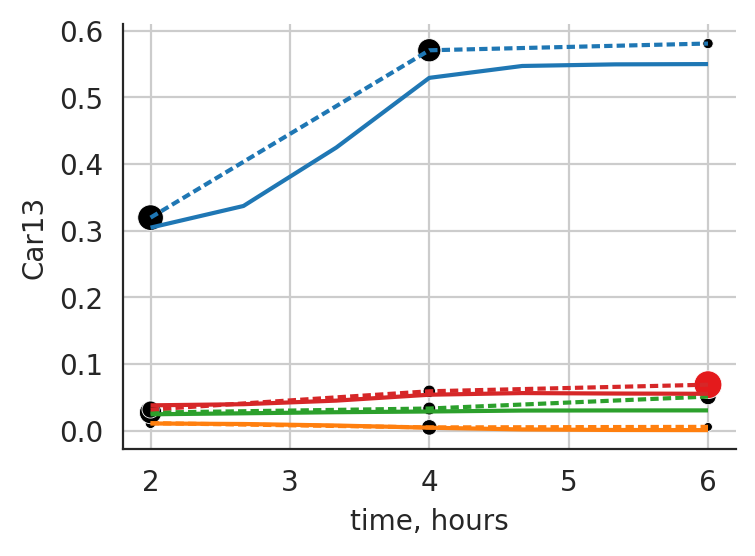

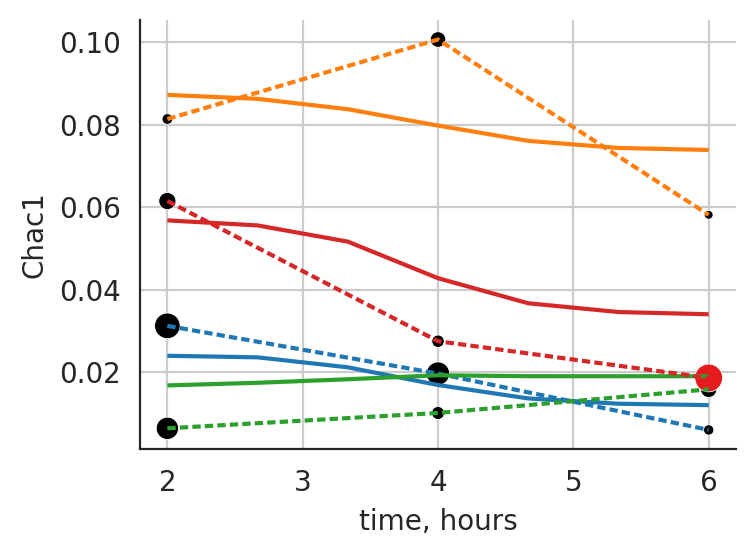

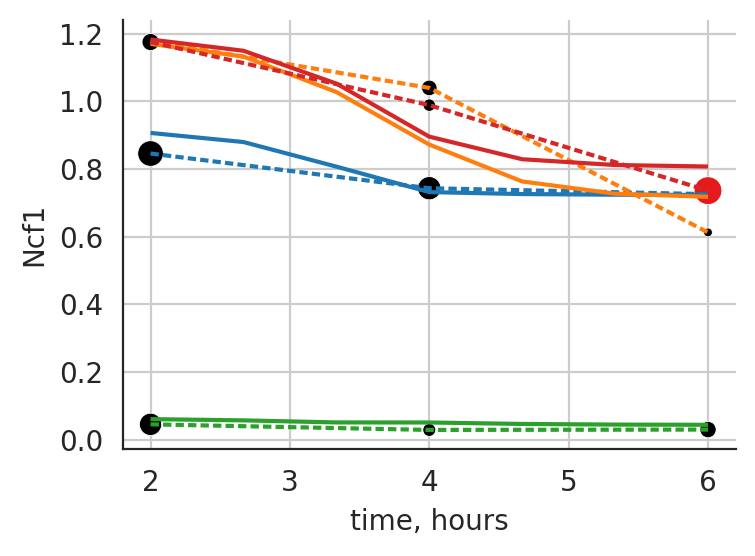

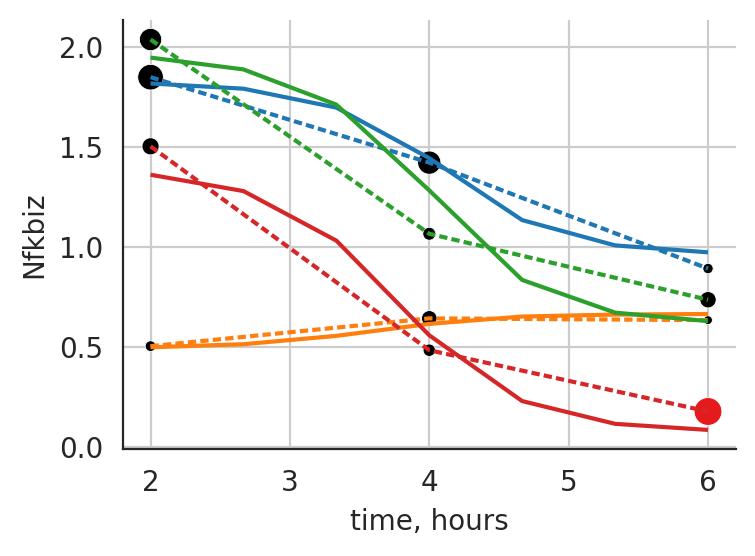

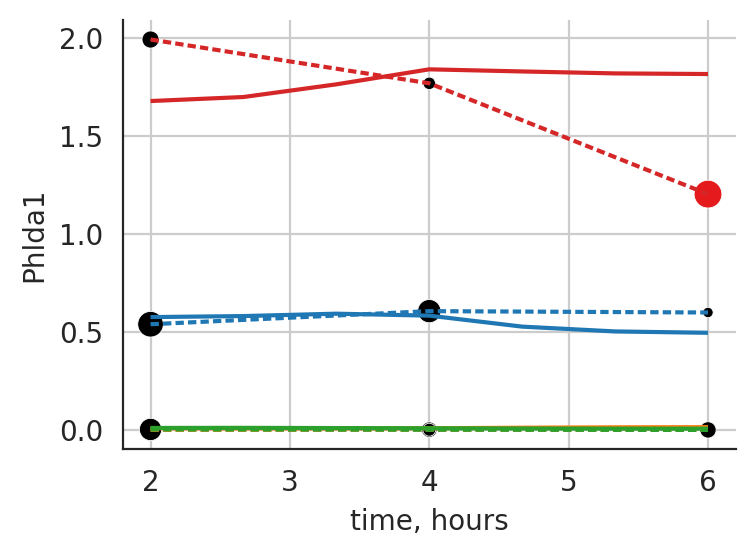

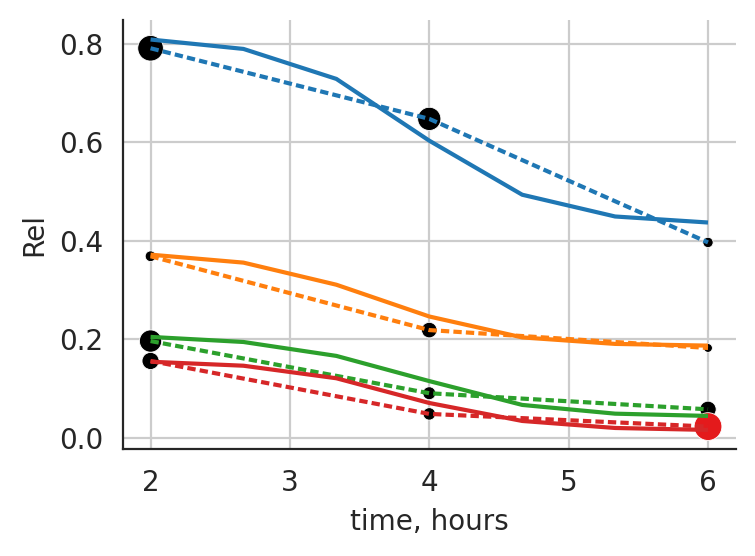

In [38]:
for gene in tgt_genes:
    cpa_plots.plot_contvar_response(
        reconstructed_response, 
        df_ref=df_reference,
        var_name='species',
        xlabelname='time, hours',
        postfix=f'reconstructed_{gene}',
        response_name=gene,
        figsize=(4, 3),
        bbox=(1.6, 1.),
        logdose=False,
        filename=f'figures/suppfig_cs/{gene}_dose.png',
        title_name='',
    )


# Scores

In [29]:
adata_random = sc.pp.subsample(adata, n_obs=1000, copy=True)
genes_control = cpa_api.datasets['training'].subset_condition(control=True).genes
df_train = cpa_api.evaluate_r2(cpa_api.datasets['training'].subset_condition(control=False), genes_control, adata_random.X.A)
df_train['benchmark'] = 'CPA'
df_train['split'] = 'train'

genes_control = cpa_api.datasets['test'].subset_condition(control=True).genes
df_test = cpa_api.evaluate_r2(cpa_api.datasets['test'].subset_condition(control=False), genes_control, adata_random.X.A)
df_test['benchmark'] = 'CPA'
df_test['split'] = 'test'

genes_control = cpa_api.datasets['test'].subset_condition(control=True).genes
df_ood = cpa_api.evaluate_r2(cpa_api.datasets['ood'], genes_control, adata_random.X.A)
df_ood['benchmark'] = 'CPA'
df_ood['split'] = 'ood'

In [30]:
df_score = pd.concat([df_test, df_ood])
df_score['time'] = [float(d)*6 for d in df_score['dose_val'].values]
# df_score.round(2).sort_values(by=['cell_type', 'R2_mean', 'R2_mean_DE'], ascending=False)
df_score = df_score.round(2).sort_values(by=['species', 'R2_mean', 'R2_mean_DE', 'R2_var'], ascending=False)

cols_print = ['species', 'time','R2_mean', 'R2_mean_DE', 'R2_var', 'split', 'num_cells']
df_latex = df_score[cols_print].round(2).copy()
df_latex = df_latex.replace('ood', '\textbf{ood}')
print(df_latex.to_latex(index=False, bold_rows=True, escape=False))

\begin{tabular}{lrrrrlr}
\toprule
species &  time &  R2_mean &  R2_mean_DE &  R2_var &        split &  num_cells \\
\midrule
    rat &   2.0 &     1.00 &        0.99 &    0.97 &         test &       2138 \\
    rat &   4.0 &     0.98 &        0.95 &    0.91 &         test &       1715 \\
    rat &   6.0 &     0.96 &        0.89 &    0.80 & \textbf{ood} &       7827 \\
    rat &   2.0 &     0.72 &        0.36 &   -6.58 &         test &       2138 \\
    rat &   6.0 &     0.72 &        0.30 &   -3.66 & \textbf{ood} &       7827 \\
    rat &   4.0 &     0.72 &        0.29 &   -4.60 &         test &       1715 \\
 rabbit &   2.0 &     0.99 &        0.98 &    0.97 &         test &       2662 \\
 rabbit &   4.0 &     0.99 &        0.98 &    0.97 &         test &       1732 \\
 rabbit &   6.0 &     0.99 &        0.98 &    0.97 &         test &       2088 \\
 rabbit &   2.0 &     0.61 &        0.44 &   -0.14 &         test &       2662 \\
 rabbit &   4.0 &     0.61 &        0.40 &   -0.05 &   

In [31]:
df_plot = df_ood.melt(id_vars=['species', 'condition', 'dose_val', 'model', 'num_cells', 'split'])

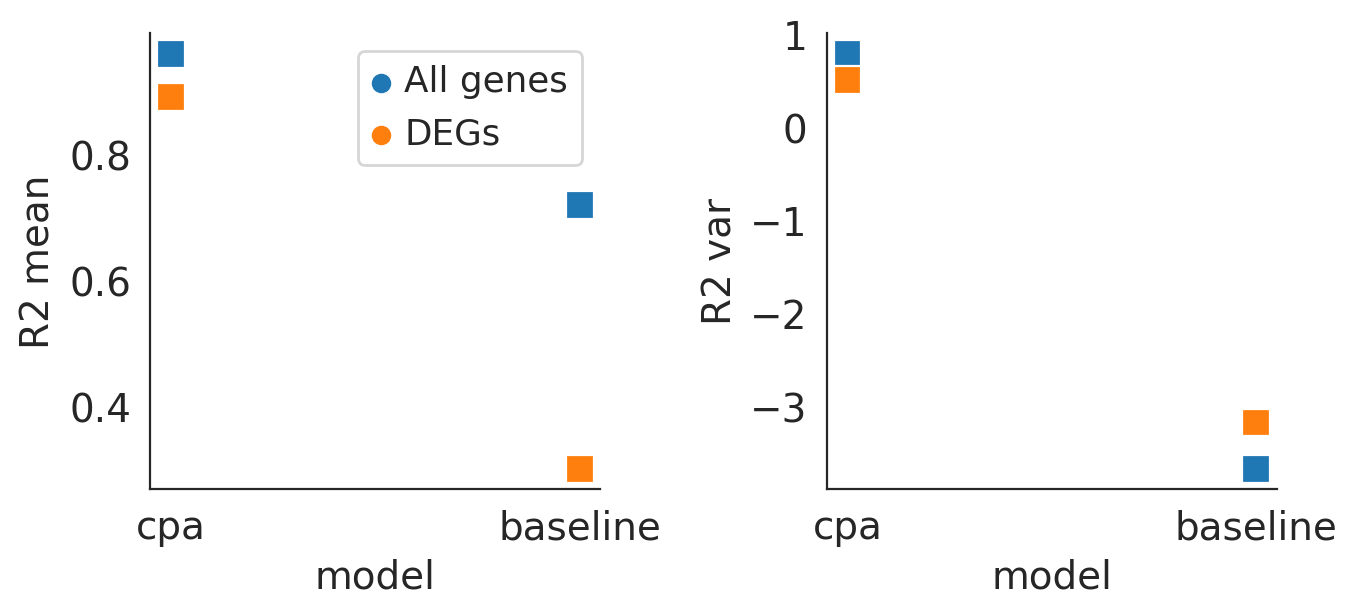

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.3))
sns.scatterplot(
    x='model', 
    y='value', 
    hue='variable', 
    marker='s',
    s=100,
    data=df_plot[df_plot.variable.str.contains('mean')], ax=ax[0]
)
sns.scatterplot(
    x='model', 
    y='value', 
    hue='variable', 
    marker='s',
    s=100,
    data=df_plot[df_plot.variable.str.contains('var')], ax=ax[1]
)
ax[0].set_xlabel('model')
ax[1].set_xlabel('model')
ax[0].set_ylabel('R2 mean')
ax[1].set_ylabel('R2 var')
handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['All genes', 'DEGs'])
ax[1].get_legend().remove()
sns.despine()
fig.tight_layout()
fig.savefig('figures/suppfig_cs/evaluation.png', dpi=600, bbox_inches='tight')

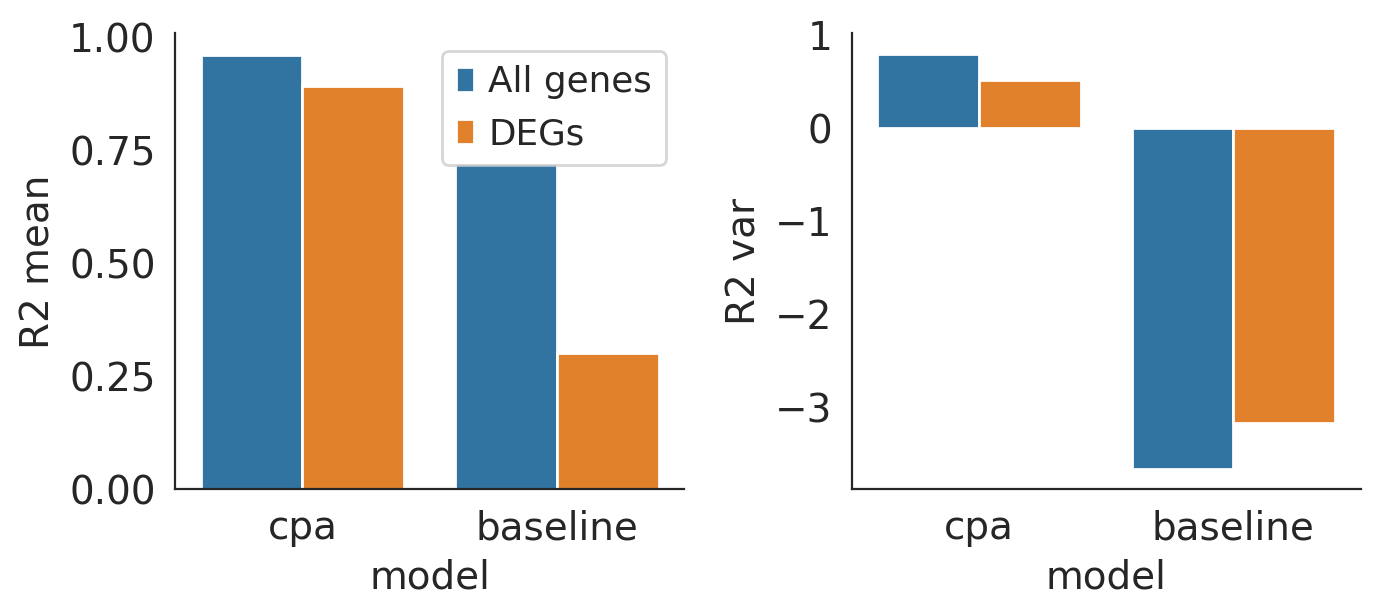

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.3))
sns.barplot(
    x='model', 
    y='value', 
    hue='variable', 
    #marker='s',
    data=df_plot[df_plot.variable.str.contains('mean')], ax=ax[0]
)
sns.barplot(
    x='model', 
    y='value', 
    hue='variable', 
    #marker='s',
    data=df_plot[df_plot.variable.str.contains('var')], ax=ax[1]
)
ax[0].set_xlabel('model')
ax[1].set_xlabel('model')
ax[0].set_ylabel('R2 mean')
ax[1].set_ylabel('R2 var')
handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend(handles, ['All genes', 'DEGs'])
ax[1].get_legend().remove()
sns.despine()
fig.tight_layout()
fig.savefig('figures/suppfig_cs/evaluation_boxplot.png', dpi=600, bbox_inches='tight')